# CitiBike 2024 - Exploratory Analysis

This will be an exploratory look at NYC Citi Bike usage (July-August 2024).

In [1]:
%cd OneDrive/Documents/Portfolio_Projects/project7.1_citi_bike_analysis

C:\Users\dylan\OneDrive\Documents\Portfolio_Projects\project7.1_citi_bike_analysis


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set default decimal precision to 2 digits (for floats)
pd.set_option('display.precision', 2)

In [4]:
# Path to file relative to project root
file_path = Path.cwd() / "python_outputs" / "citibike_summer_2024_cleaned.pkl"
print(file_path.exists())

True


In [7]:
# Load cleaned DataFrame
citibike = pd.read_pickle(file_path)
citibike.sort_values('start_time')

,trip_id,bike_type,start_time,end_time,start_station,end_station,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration_min,start_day_of_week,end_day_of_week,start_hour_label,end_hour_label
19387633,7B84F5F634CDA8BB,classic bike,2024-07-01 00:00:00.191,2024-07-01 00:02:36.490,Suffolk St & Stanton St,E 1 St & 1 Ave,40.72,-73.99,40.72,-73.99,member,2.6,Monday,Monday,12 AM,12 AM
19472603,DBB782A5C99B6E7E,classic bike,2024-07-01 00:00:02.094,2024-07-01 00:02:20.012,Central Park North & Adam Clayton Powell Blvd,Frederick Douglass Blvd & W 112 St,40.80,-73.96,40.80,-73.96,member,2.3,Monday,Monday,12 AM,12 AM
20096469,22E114FCBE32E241,electric bike,2024-07-01 00:00:04.388,2024-07-01 00:31:37.330,E 44 St & Lexington Ave,Boston Rd & Prospect Ave,40.75,-73.97,40.83,-73.90,member,31.5,Monday,Monday,12 AM,12 AM
19687570,5A610C236923ABC5,electric bike,2024-07-01 00:00:06.747,2024-07-01 00:20:32.477,Greenwich St & Perry St,W 82 St & Central Park West,40.73,-74.01,40.78,-73.97,member,20.4,Monday,Monday,12 AM,12 AM
20115753,730F8FF780DC2575,electric bike,2024-07-01 00:00:07.273,2024-07-01 00:10:50.561,E 58 St & 1 Ave (NW Corner),E 75 St & 3 Ave,40.76,-73.96,40.77,-73.96,casual,10.7,Monday,Monday,12 AM,12 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29054672,0B77EDFA8D0178C7,electric bike,2024-08-31 23:59:49.884,2024-09-01 00:08:07.078,E 14 St & 1 Ave,Kenmare St & Elizabeth St,40.73,-73.98,40.72,-73.99,member,8.3,Saturday,Sunday,11 PM,12 AM
28984152,8DE04615C0C5D34F,classic bike,2024-08-31 23:59:50.585,2024-09-01 00:04:10.057,Sterling Pl & Ralph Ave,Park Pl & Thomas S. Boyland St,40.67,-73.92,40.67,-73.91,member,4.3,Saturday,Sunday,11 PM,12 AM
28429681,B093835DE6F46D39,electric bike,2024-08-31 23:59:53.401,2024-09-01 00:24:44.004,Sullivan St & Washington Sq,Emerson Pl & Myrtle Ave,40.73,-74.00,40.69,-73.96,member,24.8,Saturday,Sunday,11 PM,12 AM
28806679,F50C7B259F0BC14A,electric bike,2024-08-31 23:59:57.114,2024-09-01 00:03:29.825,Wyckoff Ave & Stanhope St,Menahan St & Onderdonk Ave,40.70,-73.92,40.71,-73.91,member,3.5,Saturday,Sunday,11 PM,12 AM


### Hourly Usage Trends

In [10]:
# Group by `start_hour_label`
hourly_usage = citibike.groupby('start_hour_label').size().reset_index(name='trip_count').sort_values('start_hour_label')

In [12]:
# Set order for hour labels
hour_order = [
    '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
    '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
]

# Change `start_time_hour` to 'categorical type' (to preserve the order)
hourly_usage['start_hour_label'] = pd.Categorical(hourly_usage['start_hour_label'], categories=hour_order, ordered=True)

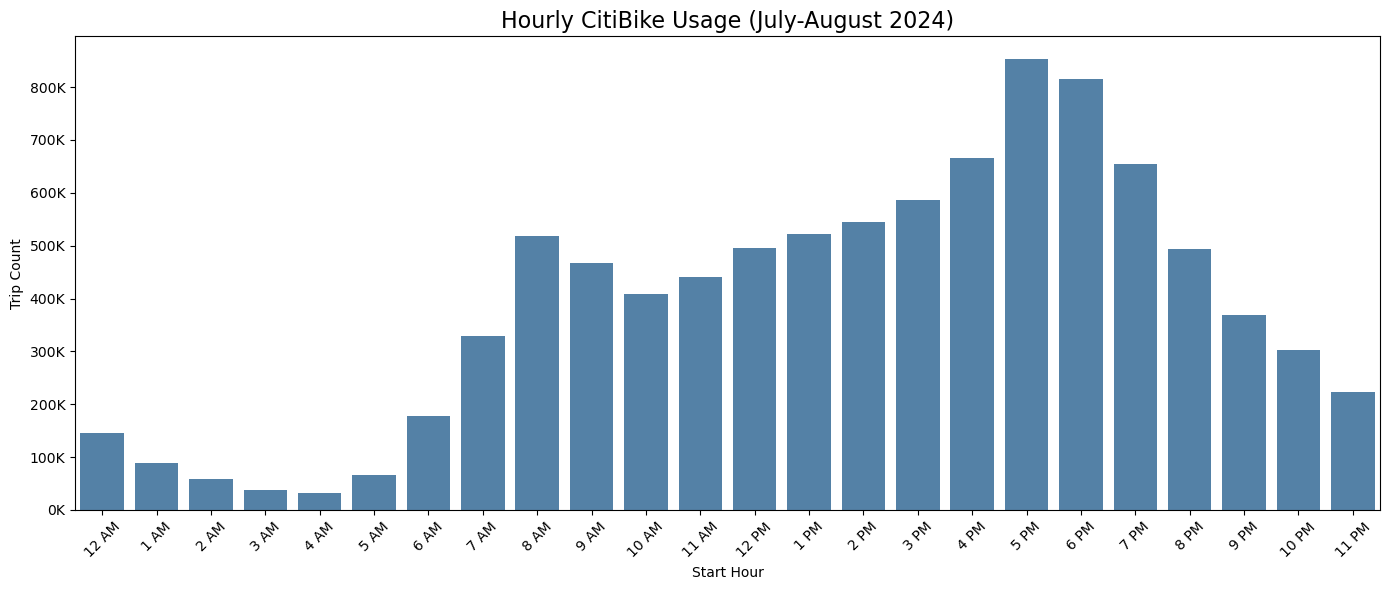

In [14]:
from matplotlib.ticker import FuncFormatter

# Plot trip count by start hour
plt.figure(figsize=(14, 6))
sns.barplot(data=hourly_usage, x='start_hour_label', y='trip_count', color='steelblue')
plt.title('Hourly CitiBike Usage (July-August 2024)', fontsize=16)
plt.xlabel('Start Hour')
plt.ylabel('Trip Count')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000):,}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is a major peak during afternoon rush hour **(5-6PM)**. There is a minor peak during morning rush hour **(8-9AM)**.

### Weekday x Hour Heatmap

In [17]:
# Group by weekday and hour
weekday_hour = citibike.groupby(['start_day_of_week', 'start_hour_label']).size().reset_index(name='trip_count')

In [18]:
# Set order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Change weekday and hour to 'categorical type' (to preserve the order)
weekday_hour['start_day_of_week'] = pd.Categorical(weekday_hour['start_day_of_week'], categories=weekday_order, ordered=True)
weekday_hour['start_hour_label'] = pd.Categorical(weekday_hour['start_hour_label'], categories=hour_order, ordered=True)

In [19]:
# Pivot for heatmap format
weekday_hour_pivoted = weekday_hour.pivot(index='start_day_of_week', columns='start_hour_label', values='trip_count')

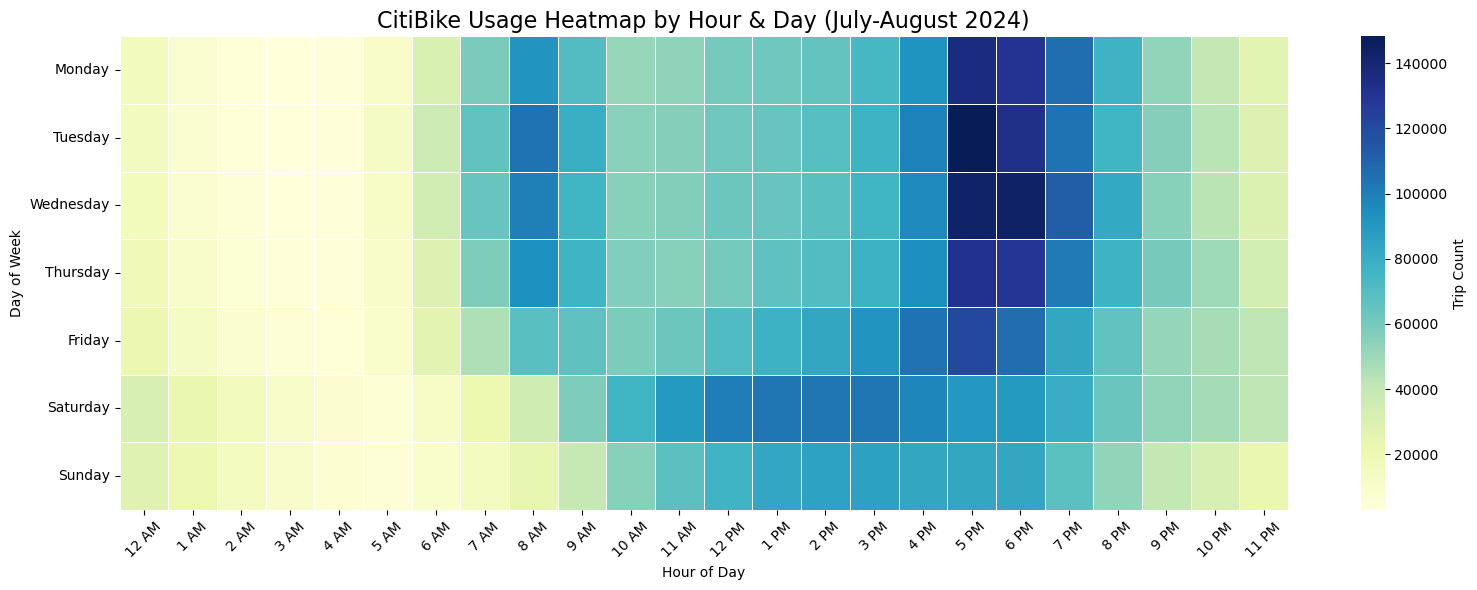

In [23]:
# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(weekday_hour_pivoted, cmap='YlGnBu', linewidths=0.5, linecolor='white', fmt=',', cbar_kws={'label': 'Trip Count'})
plt.title('CitiBike Usage Heatmap by Hour & Day (July-August 2024)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weekdays show sharp AM/PM rush hour peaks while weekends experience steady usage from 9AM - 8PM.

### Key Performance Indicators (KPIs)
##### <sub>for every weekday/hour combination

##### Total Trips

In [28]:
# Calculate total trip counts
total_trips = citibike.groupby(['start_day_of_week', 'start_hour_label']).size().reset_index(name='total_trips')

##### Most Common Start Station

In [30]:
# Find most common `start_station`
def find_most_common_start_station(series):
    return series.mode().iloc[0] if not series.mode().empty else None  # returns the mode of the series of stations

top_start_station = citibike.groupby(['start_day_of_week', 'start_hour_label'])['start_station'].agg(find_most_common_start_station).reset_index(name='top_start_station')

In [33]:
# Merge these KPIs into one DataFrame (`kpi_summary`)
kpi_summary = pd.merge(total_trips, top_start_station, on=['start_day_of_week', 'start_hour_label'])

##### Most Common End Station

In [36]:
# Find most common `end_station`
def find_most_common_end_station(series):
    return series.mode().iloc[0] if not series.mode().empty else None

top_end_station = citibike.groupby(['start_day_of_week', 'start_hour_label'])['end_station'].agg(find_most_common_end_station).reset_index(name='top_end_station')

In [37]:
# Merge into `kpi_summary`
kpi_summary = pd.merge(kpi_summary, top_end_station, on=['start_day_of_week', 'start_hour_label'])

##### Loop Trip Rate (% of trips that start and end at the same station)

In [41]:
# Create loop trip boolean column
citibike['is_loop_trip'] = citibike['start_station'] == citibike['end_station']

In [42]:
# Group and calculate loop rate by weekday/hour
loop_trip_rate = citibike.groupby(['start_day_of_week', 'start_hour_label'])['is_loop_trip'].mean().mul(100).round(1).reset_index(name='loop_trip_rate')

In [44]:
# Merge into `kpi_summary`
kpi_summary = pd.merge(kpi_summary, loop_trip_rate, on=['start_day_of_week', 'start_hour_label'])

##### Average Trip Duration (in minutes)

In [48]:
# Find average trip duration (in minutes)
avg_trip_duration = citibike.groupby(['start_day_of_week', 'start_hour_label'])['trip_duration_min'].mean().round(1).reset_index(name='avg_trip_duration_min')

In [50]:
# Merge into `kpi_summary`
kpi_summary = pd.merge(kpi_summary, avg_trip_duration, on=['start_day_of_week', 'start_hour_label'])

In [52]:
# Create additional column for 'full minutes + seconds' format
def format_duration(mins_float):
    minutes = int(mins_float)
    seconds = round((mins_float - minutes) * 60)
    return f"{minutes} minutes {seconds} seconds"

kpi_summary['avg_trip_duration_text'] = kpi_summary['avg_trip_duration_min'].apply(format_duration)

##### Average Trip Distance (in miles)

In [55]:
# Define the 'Haversine formula' (the distance between 2 points on a sphere)
def haversine_miles(lat1, lng1, lat2, lng2):
    R = 3958.8  # radius of Earth in miles
    
    # Convert all latitude/longitude values from degrees to radians... radians are the standard unit of angular measure
    lat1_rad, lng1_rad = np.radians(lat1), np.radians(lng1)
    lat2_rad, lng2_rad = np.radians(lat2), np.radians(lng2)

    # Differences in coordinates
    delta_lat = lat2_rad - lat1_rad
    delta_lng = lng2_rad - lng1_rad

    # a = square of half the chord length between the 2 points
    a = np.sin(delta_lat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lng/2)**2  # 

    # c = great-circle angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # distance in miles

In [57]:
# Create column for trip distance (in miles)
citibike['trip_distance_miles'] = haversine_miles(
    citibike['start_lat'], citibike['start_lng'],
    citibike['end_lat'], citibike['end_lng']
)

In [59]:
# Group and calculate average distance by weekday/hour
avg_trip_distance = citibike.groupby(['start_day_of_week', 'start_hour_label'])['trip_distance_miles'].mean().round(2).reset_index(name='avg_trip_distance_miles')

In [60]:
# Merge into `kpi_summary`
kpi_summary = pd.merge(kpi_summary, avg_trip_distance, on=['start_day_of_week', 'start_hour_label'])

##### Average Speed (miles per hour)

In [64]:
# Create column for average speed (miles per hour)
kpi_summary['avg_speed_mph'] = (kpi_summary['avg_trip_distance_miles'] / (kpi_summary['avg_trip_duration_min'] / 60)).round(2)

### KPI Summary DataFrame

In [67]:
# Change weekday and hour to 'categorical type' (to preserve the order)
kpi_summary['start_day_of_week'] = pd.Categorical(weekday_hour['start_day_of_week'], categories=weekday_order, ordered=True)
kpi_summary['start_hour_label'] = pd.Categorical(weekday_hour['start_hour_label'], categories=hour_order, ordered=True)

# Preview resulting DataFrame
kpi_summary.sort_values(['start_day_of_week', 'start_hour_label'])

,start_day_of_week,start_hour_label,total_trips,top_start_station,top_end_station,loop_trip_rate,avg_trip_duration_min,avg_trip_duration_text,avg_trip_distance_miles,avg_speed_mph
30,Monday,12 AM,15931,Broadway & W 48 St,W 41 St & 8 Ave,4.2,14.9,14 minutes 54 seconds,1.45,5.84
24,Monday,1 AM,7885,8 Ave & W 31 St,11 Ave & W 41 St,5.3,14.6,14 minutes 36 seconds,1.37,5.63
32,Monday,2 AM,4492,Broadway & E 14 St,8 Ave & W 27 St,5.4,14.5,14 minutes 30 seconds,1.38,5.71
34,Monday,3 AM,3072,Bleecker St & Crosby St,Willoughby Ave & Hall St,6.1,15.0,15 minutes 0 seconds,1.41,5.64
36,Monday,4 AM,3668,6 Ave & W 33 St,University Pl & E 14 St,3.3,12.6,12 minutes 36 seconds,1.45,6.90
...,...,...,...,...,...,...,...,...,...,...
91,Sunday,7 PM,67661,Pier 61 at Chelsea Piers,10 Ave & W 14 St,4.1,15.6,15 minutes 36 seconds,1.29,4.96
93,Sunday,8 PM,53023,10 Ave & W 14 St,11 Ave & W 41 St,4.0,14.9,14 minutes 54 seconds,1.29,5.19
95,Sunday,9 PM,40131,10 Ave & W 14 St,11 Ave & W 41 St,3.8,14.5,14 minutes 30 seconds,1.32,5.46
75,Sunday,10 PM,31674,E 161 St & River Ave,11 Ave & W 41 St,3.6,14.5,14 minutes 30 seconds,1.73,7.16


The plan is to have a **density map** as the focal point of the dashboard, with a different result/page presented for every hour of every day of the week.
> This will be similar to a Doppler radar in weather forecasting, but there is no forecasting taking place here.

### `start_station` Density Map

In [73]:
# Calculate trip counts for every `start_station` (across all weekday/hour combinations, latitudes, and longitudes)
start_station_density = (
    citibike.groupby(['start_station', 'start_day_of_week', 'start_hour_label', 'start_lat', 'start_lng']).size().reset_index(name='trip_count')
)

In [74]:
# Reorder columns for better organization
start_station_density = start_station_density[[
    'start_day_of_week', 'start_hour_label', 'start_station', 'start_lat', 'start_lng', 'trip_count'
]]

In [75]:
# Preview resulting DataFrame
start_station_density

,start_day_of_week,start_hour_label,start_station,start_lat,start_lng,trip_count
0,Friday,1 AM,1 Ave & E 110 St,40.79,-73.94,9
1,Friday,1 PM,1 Ave & E 110 St,40.79,-73.94,42
2,Friday,10 AM,1 Ave & E 110 St,40.79,-73.94,36
3,Friday,10 PM,1 Ave & E 110 St,40.79,-73.94,21
4,Friday,11 AM,1 Ave & E 110 St,40.79,-73.94,23
...,...,...,...,...,...,...
324038,Wednesday,6 PM,Yankee Ferry Terminal,40.69,-74.02,19
324039,Wednesday,7 PM,Yankee Ferry Terminal,40.69,-74.02,10
324040,Wednesday,8 AM,Yankee Ferry Terminal,40.69,-74.02,3
324041,Wednesday,8 PM,Yankee Ferry Terminal,40.69,-74.02,2


### Final Export

In [79]:
# Save full dataset to Pickle (Python only)
citibike.to_pickle('citibike_final.pkl')

# Save Tableau-ready DataFrames to CSV
kpi_summary.to_csv('kpi_summary.csv', index=False)
start_station_density.to_csv('start_station_density_map.csv', index=False)
weekday_hour.to_csv('weekday_hour_heatmap.csv', index=False)